![](TN-comunidades-Instituto-Tecnologico-de-Durango.png)
 
<div style = "Text-align: center">
    
# Analisis de datos masivos
## Visualizacion Avanzada de Datos
## Nombre del docente 
### Jose Gabriel Rodriguez Rivas
## Nombre del alumno
### Oswaldo Zura Alvarado
    
</div>

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [2]:
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In [3]:
query = 'SELECT * from average_speed'
df = pd.read_sql(query, conn)
df.head()

,index,Area,Average_p,Average_u,Average_d
0,0,E07000188,8.451897,21.114114,51.967713
1,1,E07000101,8.317833,20.733028,51.709226
2,2,E09000030,8.983481,22.469438,54.412001
3,3,E09000031,8.956481,22.353593,55.138017
4,4,E09000032,9.144285,22.859003,55.962499


In [4]:
df.drop('index',inplace=True,axis=1)
df.shape

(326, 4)

In [5]:
df.head()

,Area,Average_p,Average_u,Average_d
0,E07000188,8.451897,21.114114,51.967713
1,E07000101,8.317833,20.733028,51.709226
2,E09000030,8.983481,22.469438,54.412001
3,E09000031,8.956481,22.353593,55.138017
4,E09000032,9.144285,22.859003,55.962499


In [6]:
la_json = pd.read_json('LA_poligons.json')
la_json.head()

,LA_code,geometry
0,E06000001,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
1,E06000002,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
2,E06000003,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
3,E06000004,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
4,E06000005,"{u'type': u'Polygon', u'coordinates': [[[-1.63..."


In [7]:
df_promedio = df[['Area', 'Average_d']]
df_promedio = df_promedio.rename(columns = {'Area':'LA_code'})
df_promedio.head()

,LA_code,Average_d
0,E07000188,51.967713
1,E07000101,51.709226
2,E09000030,54.412001
3,E09000031,55.138017
4,E09000032,55.962499


In [8]:
print(df_promedio.Average_d.min())
print(df_promedio.Average_d.max())

0.0
70.19295547285596


In [9]:
np.arange(1, 12, (12-1)/6)
bins = np.arange(df_promedio.Average_d.min(), df_promedio.Average_d.max(),
                (df_promedio.Average_d.max() - df_promedio.Average_d.min() /6))

bins = list(bins)
print(bins)

[0.0]


#### Parte 2: Visualizar los Datos

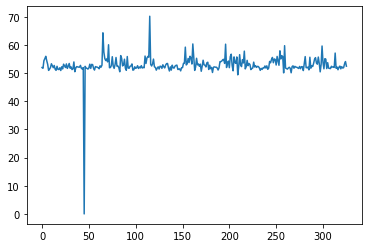

In [10]:
df_promedio.Average_d.plot()

In [11]:
#Verificar datos que lleven el valor 0 
df_promedio[df_promedio.Average_d==0]

,LA_code,Average_d
45,DateTime,0.0


In [12]:
#Eliminar datos que lleven 0
df_promedio.drop(45,inplace=True)

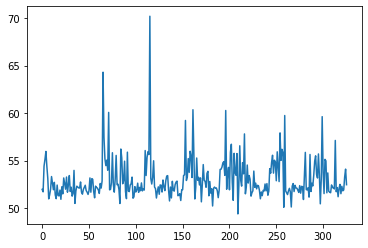

In [13]:
df_promedio.Average_d.plot()

In [14]:
import folium_utils
mymap = folium_utils.folium_top_x_preds_mapper(df_promedio, la_json,
                                               'LA_code',
                                              'Ping_promedio',
                                              bins)

SyntaxError: invalid syntax (folium_utils.py, line 82)